In [1]:
import os
import cv2
from skimage.feature import hog
from sklearn.svm import SVC
from skimage import io

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("rashikrahmanpritom/plant-disease-recognition-dataset")

# print("Path to dataset files:", path)

In [3]:
train_path = "./dataset/Train/Train"
test_path = "./dataset/Test/Test"

In [4]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):  
        class_folder = os.path.join(folder, label)
        if os.path.isdir(class_folder): 
            for filename in os.listdir(class_folder):
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
                # Skip unreadable images
                if img is not None:
                    
                    img = cv2.resize(img, (256, 256)) # Resize to 256x256
                    images.append(img)
                    labels.append(label) 
    return images, labels

In [5]:
train_images, train_labels = load_images_from_folder(train_path)
test_images, test_labels = load_images_from_folder(test_path)

In [6]:
def extract_hog_features(images):
    features = []
    for img in images:
       
        hog_feature = hog(
            img,
            orientations=12,                 
            pixels_per_cell=(16, 16),       
            cells_per_block=(2, 2),          
            block_norm='L2-Hys'              
        )
        features.append(hog_feature)
    return np.array(features)

In [7]:
X_train = extract_hog_features(train_images)
X_test = extract_hog_features(test_images)

In [8]:
def load_images(image_paths):
    images = []
    for path in image_paths:
        # Charger l'image
        img = io.imread(path)
        images.append(img)
    
    # Convertir en tableau NumPy
    images_array = np.array(images)
    
    # Récupérer la forme du tableau d'images
    num_images, height, width, channels = images_array.shape
    print(f"Nombre d'images: {num_images}, Hauteur: {height}, Largeur: {width}, Canaux: {channels}")
    
    return images_array

In [9]:
X_train = load_images(train_path)
X_test = load_images(test_path)

OSError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

AttributeError: 'list' object has no attribute 'shape'

TypeError: Invalid shape (10800,) for image data

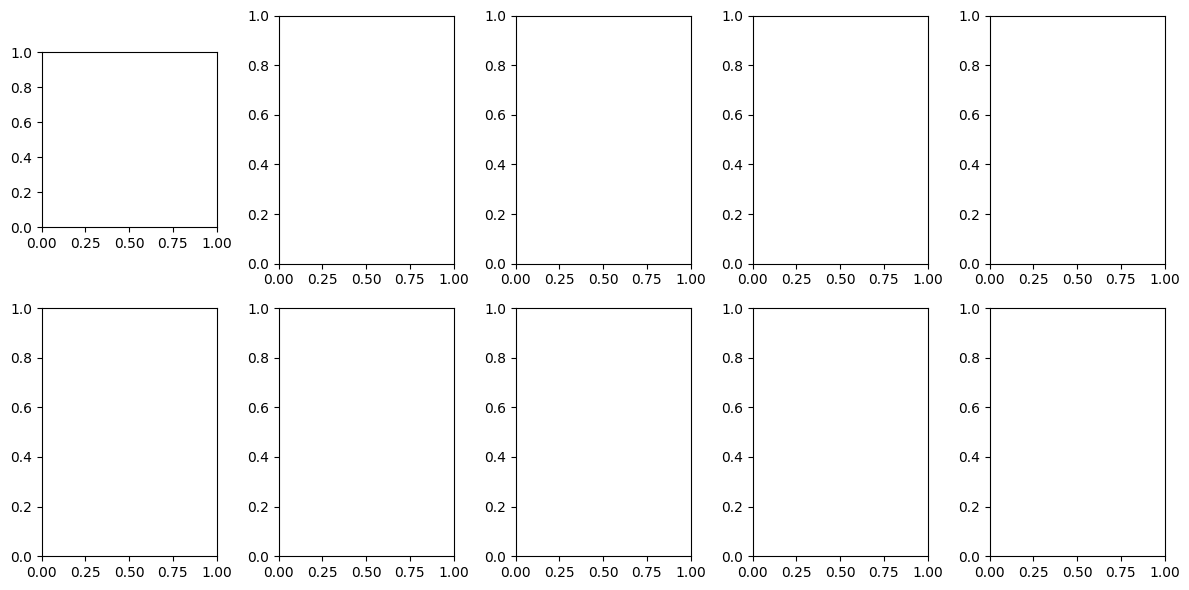

In [13]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show()